In [1]:
import os

In [2]:
os.environ["KAGGLE_CONFIG_DIR"] = "/Users/apurbakoirala/Developer/Deep-Learning-Projects"

In [3]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/Users/apurbakoirala/anaconda3/envs/myenv/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/apurbakoirala/anaconda3/envs/myenv/lib/python3.10/site-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/Users/apurbakoirala/anaconda3/envs/myenv/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/apurbakoirala/Developer/Deep-Learning-Projects. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

/Users/apurbakoirala/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████| 163M/163M [02:33<00:00, 1.12MB/s]

Extracting files...


Path to dataset files: /Users/apurbakoirala/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [6]:
!ls

FaceMaskDetection.ipynb face-mask-dataset


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [12]:
!ls

FaceMaskDetection.ipynb data


In [21]:
with_mask_files = os.listdir('./data/with_mask')
without_mask_files = os.listdir('./data/without_mask')

In [22]:
print(with_mask_files[0:5])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']


In [23]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [24]:
img = mpimg.imread("./data/with_mask/with_mask_2140.jpg")

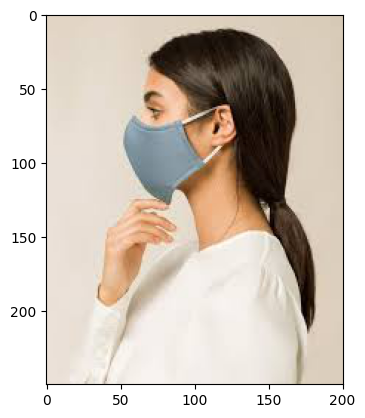

In [25]:
plt.imshow(img)

Image processing, to numpy arrays

In [33]:
with_mask_path = "./data/with_mask/"
data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [35]:
without_mask_path = './data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [36]:
len(data)

7553

In [37]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [38]:
labels = with_mask_labels + without_mask_labels

In [40]:
X = np.array(data)
Y = np.array(labels)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [42]:
X_train[0]

array([[[230, 230, 232],
        [230, 230, 232],
        [230, 230, 232],
        ...,
        [229, 227, 230],
        [229, 227, 230],
        [228, 226, 228]],

       [[231, 231, 233],
        [231, 231, 233],
        [231, 231, 233],
        ...,
        [230, 228, 231],
        [230, 228, 231],
        [229, 227, 229]],

       [[233, 233, 235],
        [233, 233, 235],
        [233, 233, 235],
        ...,
        [231, 229, 232],
        [231, 229, 232],
        [230, 228, 230]],

       ...,

       [[218, 219, 221],
        [217, 218, 220],
        [217, 218, 220],
        ...,
        [215, 213, 217],
        [217, 215, 220],
        [221, 219, 222]],

       [[217, 218, 220],
        [217, 218, 220],
        [216, 217, 219],
        ...,
        [212, 210, 213],
        [221, 219, 224],
        [217, 215, 219]],

       [[217, 219, 219],
        [216, 218, 218],
        [216, 218, 218],
        ...,
        [202, 200, 201],
        [221, 219, 221],
        [218, 216, 218]]

In [43]:
X_train_scaled = X_train/255

In [44]:
X_test_scaled = X_test/255

In [45]:
import tensorflow as tf
from tensorflow import keras